In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import time

### Data Preparation

In [2]:
cols = ["ModelYear", "Make", "Model", "VehicleClass", "EngineSize", "Cylinders", "Transmission", "FuelType", "FuelCons_City", "FuelConsn_HWY", "FuelCons_COMB", "FuelCons_COMB_MPG", "CO2Emissions"]

df = pd.read_csv("./datas/fuel_consumption.csv")
df.columns = cols

df.head(5)

,ModelYear,Make,Model,VehicleClass,EngineSize,Cylinders,Transmission,FuelType,FuelCons_City,FuelConsn_HWY,FuelCons_COMB,FuelCons_COMB_MPG,CO2Emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Linear Regression NN Model

In [3]:
train_x = df[["EngineSize"]].values
train_y = df[["CO2Emissions"]].values

train_x.shape, train_y.shape

((1067, 1), (1067, 1))

In [4]:
# Initialize random variable for Linear Regression
a = tf.Variable(20.0)
b = tf.Variable(30.2)

# Define the mathematical funstion
def linear_regression(x):
   y = a*x + b
   return y

# Define the loss value (Mean Squared Error)
def loss_object(y, train_y) :
    return tf.reduce_mean(tf.square(y - train_y))
    # Below is a predefined method offered by TensorFlow to calculate loss function
    # loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

### Model Training

In [5]:
learning_rate = 0.01
train_data = []
loss_values =[]
a_values = []
b_values = []
# Steps of looping through all your data to update the parameters
epochs = 200

# Train model
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_predicted = linear_regression(train_x) # Prediction
        loss_value = loss_object(train_y,y_predicted) # MSE (Mean Squared Error)
        loss_values.append(loss_value)

        # Get gradients
        gradients = tape.gradient(loss_value, [b,a])
        
        # Adjust the value a and b
        a_values.append(a.numpy())
        b_values.append(b.numpy())
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

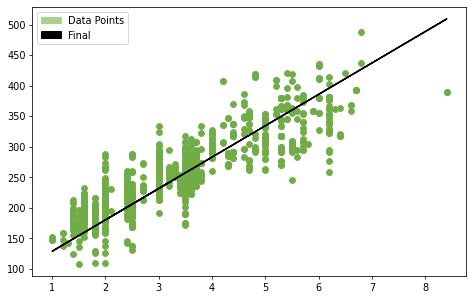

In [7]:
plt.figure(figsize = (8,5), dpi = 70)

plt.scatter(train_x, train_y, color="#70AD47")
plt.plot(train_x,a_values[-1]*train_x+b_values[-1], color="#000000")

final = mpatches.Patch(color="#000000", label="Final")
data = mpatches.Patch(color="#A9D08E", label="Data Points")

plt.legend(handles=[data, final])

plt.show()